# OKCupid Project

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance. In this project, data from OKCupid, an app that focuses on using multiple choice and short answers to match users, will be analysed. 

## The Dataset

The OKCupid Dataset contains the following features:

* `body_type`: multiple choice question with 12 possible answers: average, fit, athletic, thin, curvy, a litle extra, skinny, full figured, overweight, jacked, used up, and rather not say.
* `diet`: Icluding variations of the options: anything, vegetarian, vegan, kosher, and halal
* `drinks` : Abaut the person's drinking habits. Options are: desperately, very often, often, socially, rarely, and not at all.
* `drugs` : The person's drug use, with the options never, sometimes, or often. 
* `Education`: The education level of the person, with 32 different options.
* `essay 0` to `essay9`: Open short answers.
* `ethnicity`. The ethnicity of the person.
* `height`
* `Income`: How much the person makes a year.
* `job`: 21 possible answers.
* `location`: where the person lives.
* `offspring`: whether they have any offspring and whether they might want in the future (15 possible answers).
* `orientation`: Sexual orientation. Options are: straight, gay, or bisexual.
* `pets`: whether they like or dislike either dogs, cats or both and whether they have them as pets. 15 possible answers.
* `religion`: The religion the person follows an how important it is for them. 
* `sex`: Male or Female.
* `sign`: The horoscope sign and the importance the person places on horoscope. 48 possible answers.
* `smokes`" the smoking habbit of the person. Options are: yes, sometimes, when drinking, trying to quit, and no.
* `speaks`: the language/s the person speaks and the level (either poorly, okay, or fluently).
* `status`: the marital status, including the options: single, available, seeing someone, married, unknown.

## Scope of the Project

* Pre-process and explore the data. Simplify the categorical variables, deal with null values, and encode the categories into numerical values so they can be used for machine learning models. 
* Predict the body type of a person based their background and lifestyle. Use different algorithm and compare the score of the models.
* Perform feature selection using different techniques. Determine which factors of the people background and lifestyle have stronger influence over the person's body type.

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('profiles.csv')
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
# Create a subset of the dataset with the multiple choice questions only. 
mc = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'height', 'income', 'job', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign','smokes','speaks', 'status']
mc_data = data[mc]
mc_data.head()

,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
# Create a subset of the dataset with the open short questions
oq = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
oq_data = data[oq]
oq_data.head()

,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...
1,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN


In [5]:
mc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   body_type    54650 non-null  object 
 1   diet         35551 non-null  object 
 2   drinks       56961 non-null  object 
 3   drugs        45866 non-null  object 
 4   education    53318 non-null  object 
 5   ethnicity    54266 non-null  object 
 6   height       59943 non-null  float64
 7   income       59946 non-null  int64  
 8   job          51748 non-null  object 
 9   offspring    24385 non-null  object 
 10  orientation  59946 non-null  object 
 11  pets         40025 non-null  object 
 12  religion     39720 non-null  object 
 13  sex          59946 non-null  object 
 14  sign         48890 non-null  object 
 15  smokes       54434 non-null  object 
 16  speaks       59896 non-null  object 
 17  status       59946 non-null  object 
dtypes: float64(1), int64(1), object(16)
memory usa

In [7]:
mc_data.describe(include='all')

,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,54650,35551,56961,45866,53318,54266,59943.000000,59946.000000,51748,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,12,18,6,3,32,217,NaN,NaN,21,15,3,15,45,2,48,5,7647,5
top,average,mostly anything,socially,never,graduated from college/university,white,NaN,NaN,other,doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,14652,16585,41780,37724,23959,32831,NaN,NaN,7589,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,NaN,NaN,NaN,NaN,NaN,NaN,68.295281,20033.222534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.994803,97346.192104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Pre-Processing: Category Simplification

With the exception of `height` and `income`, the features included in the dataset are categorical. However, most of the features present a elevated amount of categories, which may become a problem when fiting predictive models. In order to avoid this issue, the features will be simplified by merging together some of the closely related categories. As an example, the feature `diet` contains the categories `strictly vegetarian`, `mostly vegatarian` and `vegetarian`. For the purpose of this project, the three categories can be merged together into just `vegetarian`. 

In [9]:
mc_data.diet.value_counts()


diet
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64

In [10]:
# Merge categories in the feature `diet` for model simplification
# Remove the prefixes 'mtrictly' or 'mostly' and any potential white spaces
mc_data['diet'] = mc_data['diet'].str.replace(r'^(strictly|mostly)\s+', '', regex=True)
mc_data.diet.value_counts()

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_7328\3431613338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_data['diet'] = mc_data['diet'].str.replace(r'^(strictly|mostly)\s+', '', regex=True)


diet
anything      27881
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: count, dtype: int64

In [11]:
mc_data.body_type.value_counts()

body_type
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64

In [15]:
# Merge categories in the 'body_type' feature for model simplification
# Create a mapping dictionary 
body_mapping = {
    'thin': 'lean',
    'skiny': 'lean',
    'fit': 'lean',
    'curvy': 'curvy',
    'a little extra': 'curvy',
    'full figured': 'fuller',
    'overweight': 'fuller',
    'athletic': 'muscular',
    'jacked': 'muscular',
    'used up': 'other_unkown',
    'rather not say': 'other_unkown'    
}

# Apply mapping to the body_type feature
mc_data['body_type'] = mc_data['body_type'].map(body_mapping)
mc_data.body_type.value_counts()

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_7328\2869586790.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_data['body_type'] = mc_data['body_type'].map(body_mapping)


body_type
lean            17422
muscular        12240
curvy            6553
fuller           1453
other_unkown      553
Name: count, dtype: int64

In [22]:
mc_data.education.value_counts()

education
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
d

In [24]:
def simplify_education(education):
    # Check on missing values and return them as np.NaN
    if pd.isna(education):
        return np.NaN
    #Convert education to string and lower case
    education = str(education).lower()

    # Check for keywords in the education field and return the new category
    if 'high school' in education:
        return 'high school or less'
    elif 'college' in education:
        return 'college or less'
    elif 'masters program' in education:
        return 'graduate degree or less'
    elif 'space' in education: 
        return 'other'
    elif 'ph.d program' in education:
        return 'doctorate/professional school'
    elif 'law' in education:
        return 'doctorate/professional school'
    elif 'med' in education:
        return 'doctorate/professional school'   

mc_data['education'] = mc_data['education'].apply(simplify_education)
mc_data['education'].value_counts()

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_7328\3098079619.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_data['education'] = mc_data['education'].apply(simplify_education)


education
college or less                  34485
graduate degree or less          10920
doctorate/professional school     4517
high school or less               1713
other                             1683
Name: count, dtype: int64

In [26]:
print(mc_data.ethnicity.value_counts())

ethnicity
white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: count, Length: 217, dtype: int64


In [28]:
print(mc_data.ethnicity.unique())

['asian, white' 'white' nan 'asian, black, other' 'white, other'
 'hispanic / latin, white' 'hispanic / latin' 'pacific islander, white'
 'asian' 'black, white' 'pacific islander' 'asian, native american'
 'asian, pacific islander' 'black, native american, white'
 'middle eastern, other' 'native american, white' 'indian' 'black'
 'black, native american, hispanic / latin, other'
 'black, native american, hispanic / latin'
 'asian, black, pacific islander'
 'asian, middle eastern, black, native american, indian, pacific islander, hispanic / latin, white, other'
 'other' 'hispanic / latin, other' 'asian, black' 'middle eastern, white'
 'native american, white, other' 'black, native american'
 'black, white, other' 'hispanic / latin, white, other' 'middle eastern'
 'black, other' 'native american, hispanic / latin, white' 'black, indian'
 'indian, white, other' 'middle eastern, indian, other'
 'black, native american, hispanic / latin, white, other'
 'pacific islander, hispanic / latin' '

In [30]:
# Function to simplify 'ethnicity' 
def simplify_ethnicity(ethnicity):
    if pd.isna(ethnicity):
        return np.NaN
    # Convert to lowercase for case sensitive matching
    ethnicity = ethnicity.lower()

    # Define groups' keywords
    white = ['white']
    black = ['black']
    asian = ['asian', 'indian']
    hispanic = ['hispanic', 'latin']
    native_american = ['native american']
    pacific_islander = ['pacific islander']
    middle_eastern = ['middle eastern']

    # Create a list to store the detected categories
    detected_groups = []
    # Check category group
    if any(keyword in ethnicity for keyword in white):
        detected_groups.append('white')
    if any(keyword in ethnicity for keyword in black):
        detected_groups.append('black')
    if any(keyword in ethnicity for keyword in asian):
        detected_groups.append('asian')
    if any(keyword in ethnicity for keyword in hispanic):
        detected_groups.append('hispanic / latin')
    if any(keyword in ethnicity for keyword in pacific_islander):
        detected_groups.append('pacific islander')
    if any(keyword in ethnicity for keyword in middle_eastern):
        detected_groups.append('middle eastern')

    # Control for mixed ethnicity
    if len(detected_groups) > 1:
        return 'mixed ethnicity'
    # If one group is detected
    if detected_groups:
        return detected_groups[0]
    # If no recognized group
    else:
        return 'other'

mc_data['ethnicity'] = mc_data['ethnicity'].apply(simplify_ethnicity)
mc_data['ethnicity'].value_counts()


    

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_7328\2212653830.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_data['ethnicity'] = mc_data['ethnicity'].apply(simplify_ethnicity)


ethnicity
white               33864
asian                7400
mixed ethnicity      5097
hispanic / latin     3047
black                2268
other                1789
pacific islander      448
middle eastern        353
Name: count, dtype: int64

In [32]:
mc_data['offspring'] = mc_data['offspring'].str.replace('&rsquo;', '')
mc_data.offspring.value_counts()

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_7328\3432554136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_data['offspring'] = mc_data['offspring'].str.replace('&rsquo;', '')


offspring
doesnt have kids                         7560
doesnt have kids, but might want them    3875
doesnt have kids, but wants them         3565
doesnt want kids                         2927
has kids                                 1883
has a kid                                1881
doesnt have kids, and doesnt want any    1132
has kids, but doesnt want more            442
has a kid, but doesnt want more           275
has a kid, and might want more            231
wants kids                                225
might want kids                           182
has kids, and might want more             115
has a kid, and wants more                  71
has kids, and wants more                   21
Name: count, dtype: int64

In [34]:
# Function to simplify offspring
def simplify_offspring(offspring):
    if pd.isna(offspring):
        return np.NaN
    if 'doesnt have' in offspring:
        return 'no'
    elif 'has a kid' in offspring:
        return 'one'
    elif 'has kids' in offspring:
        return 'more than one'
    else:
        return 'no'

mc_data['offspring'] = mc_data['offspring'].apply(simplify_offspring)
mc_data.offspring.value_counts()


C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_7328\697673924.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_data['offspring'] = mc_data['offspring'].apply(simplify_offspring)


offspring
no               19466
more than one     2461
one               2458
Name: count, dtype: int64

In [36]:
mc_data.pets.value_counts()

pets
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64

In [38]:
mc_data['pets'] = mc_data['pets'].apply(lambda x: 'yes' if isinstance(x,str) and 'has' in x else x if x is None else 'no')
mc_data.pets.value_counts()

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_7328\2050907996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_data['pets'] = mc_data['pets'].apply(lambda x: 'yes' if isinstance(x,str) and 'has' in x else x if x is None else 'no')


pets
no     45653
yes    14293
Name: count, dtype: int64

In [40]:
 # Create a function to simplify religion
def simplify_religion(religion):
    # Control for nul values
    if pd.isna(religion):
        return np.NaN
    # Check for keyword in the religion field
    if 'agnosticism' in religion:
        return 'agnosticism'
    elif 'catholicism' in religion:
        return 'christianity'
    elif 'christianity' in religion:
        return 'christianity'
    elif 'atheism' in religion:
        return 'atheism'
    elif 'judaism' in religion:
        return 'judaism'
    elif 'buddhism' in religion:
        return 'buddhism'
    elif 'hinduism' in religion:
        return 'hinduism'
    elif 'islam' in religion:
        return 'islam'
    elif 'other' in religion:
        return 'other'

mc_data['religion'] = mc_data['religion'].apply(simplify_religion)

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_7328\2926236758.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_data['religion'] = mc_data['religion'].apply(simplify_religion)


In [42]:
mc_data.religion.value_counts()

religion
christianity    10545
agnosticism      8812
other            7743
atheism          6985
judaism          3098
buddhism         1948
hinduism          450
islam             139
Name: count, dtype: int64

In [44]:
mc_data.sign.value_counts()

sign
gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;

In [46]:
mc_data['sign'] = mc_data['sign'].apply(lambda x: x.split()[0] if pd.notnull(x) else x)
mc_data['sign'].value_counts()

C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_7328\2131052820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mc_data['sign'] = mc_data['sign'].apply(lambda x: x.split()[0] if pd.notnull(x) else x)


sign
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: count, dtype: int64

Text(0, 0.5, 'frequency')

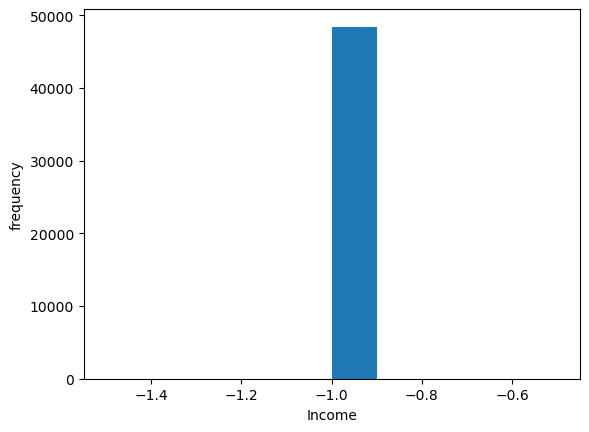

In [48]:
income = mc_data.income[data.income < 10000]
plt.hist(income, bins=10)
plt.xlabel('Income')
plt.ylabel('frequency')

In [50]:
mc_data = mc_data.drop(['income','speaks', 'job'], axis=1)

In [52]:
mc_data.describe(include='all')

,body_type,diet,drinks,drugs,education,ethnicity,height,offspring,orientation,pets,religion,sex,sign,smokes,status
count,38221,35551,56961,45866,53318,54266,59943.000000,24385,59946,59946,39720,59946,48890,54434,59946
unique,5,6,6,3,5,8,NaN,3,3,2,8,2,12,5,5
top,lean,anything,socially,never,college or less,white,NaN,no,straight,no,christianity,m,leo,no,single
freq,17422,27881,41780,37724,34485,33864,NaN,19466,51606,45653,10545,35829,4374,43896,55697
mean,NaN,NaN,NaN,NaN,NaN,NaN,68.295281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.994803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'frequency')

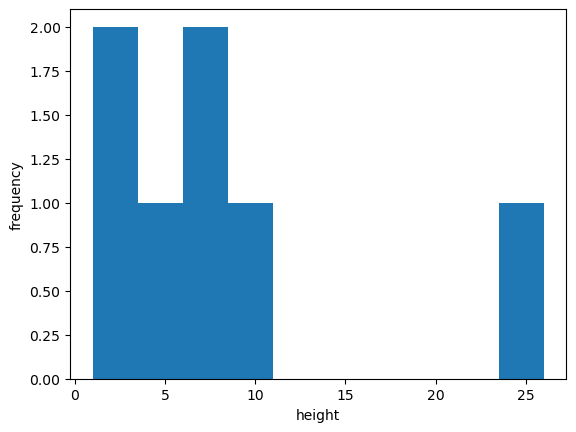

In [54]:
height = mc_data.height[mc_data.height < 35]
plt.hist(height)
plt.xlabel('height')
plt.ylabel('frequency')

In [56]:
mc_data['height'] = mc_data['height'].apply(lambda x: np.NaN if x < 35 else x)


In [58]:
mc_data.describe(include='all')

,body_type,diet,drinks,drugs,education,ethnicity,height,offspring,orientation,pets,religion,sex,sign,smokes,status
count,38221,35551,56961,45866,53318,54266,59936.000000,24385,59946,59946,39720,59946,48890,54434,59946
unique,5,6,6,3,5,8,NaN,3,3,2,8,2,12,5,5
top,lean,anything,socially,never,college or less,white,NaN,no,straight,no,christianity,m,leo,no,single
freq,17422,27881,41780,37724,34485,33864,NaN,19466,51606,45653,10545,35829,4374,43896,55697
mean,NaN,NaN,NaN,NaN,NaN,NaN,68.302306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.940899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


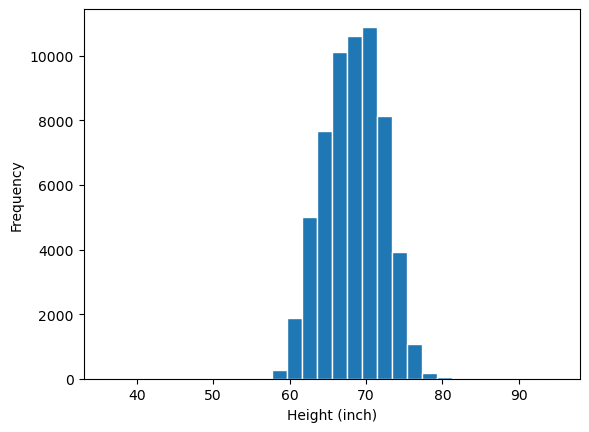

In [107]:
plt.hist(mc_data.height, bins=30, edgecolor='w')
plt.xlabel('Height (inch)')
plt.ylabel('Frequency')
plt.show()

## Feature Pre-Processing: Encoding and Scaling

Previously, the features have been selected and tidided in order to condense redundant categories together. In this section, the null values in the dataset will be dealt with in order to create the X matrix and the response variable y. Subsequently, the categorical variables will be one-hot encoded in order to be able to use them with machine learning models. 

As for the null values, eliminating all the rows with any null values in the dataset leads to a severe loss in information. From the original 59946 entries in the dataset we are left with 6050. Therefore the null values need to be process differently. As most ML models cannot handle nulls in the response variable, the rows with null values in the target variable `body_type` will be removed. The null values in the predictors will be handle in two different ways:

* Replace the null values with 'Missing' as separate category, which works well with tree-bsed models like Random Forest.
* Replace the null values with the mode (most frequent value) of that predictor, which works better for linear models or distance-based altorithms.

In [68]:
# Check the dataset with all the rows with any null value in any column removed
mc_data_not_null = mc_data.dropna()
mc_data_not_null.describe(include='all')

,body_type,diet,drinks,drugs,education,ethnicity,height,offspring,orientation,pets,religion,sex,sign,smokes,status
count,6050,6050,6050,6050,6050,6050,6050.000000,6050,6050,6050,6050,6050,6050,6050,6050
unique,5,6,6,3,5,8,NaN,3,3,2,8,2,12,5,4
top,lean,anything,socially,never,college or less,white,NaN,no,straight,no,christianity,m,gemini,no,single
freq,2538,4680,4188,4859,3810,3862,NaN,4857,5367,4188,1739,3325,557,4941,5692
mean,NaN,NaN,NaN,NaN,NaN,NaN,68.187934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.979642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Remove the rows with null values in the response variable
mc_data_2 = mc_data[mc_data['body_type'].notnull()]
mc_data_2.describe(include='all')

,body_type,diet,drinks,drugs,education,ethnicity,height,offspring,orientation,pets,religion,sex,sign,smokes,status
count,38221,23938,36558,29229,34429,34878,38218.000000,16117,38221,38221,25537,38221,31160,35021,38221
unique,5,6,6,3,5,8,NaN,3,3,2,8,2,12,5,5
top,lean,anything,socially,never,college or less,white,NaN,no,straight,no,christianity,m,leo,no,single
freq,17422,18650,27148,24160,21710,22201,NaN,12857,33126,29077,6736,23028,2829,28784,35779
mean,NaN,NaN,NaN,NaN,NaN,NaN,68.459862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.940410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Set y and X variables
y = mc_data_2['body_type']
X = mc_data_2.drop('body_type', axis=1)

# Handle null predictors with a new 'Missing' category
x_missing = X.fillna('missing')

# Handle null predictors using the mode of each predictor
x_mode = X
for column in x_mode.columns:
    mode_value = x_mode[column].mode()[0] # Compute the mode
    x_mode[column].fillna(mode_value, inplace=True)


C:\Users\CristinaFC\AppData\Local\Temp\ipykernel_7328\2084363458.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_mode[column].fillna(mode_value, inplace=True)


In [79]:
x_missing.describe()

,diet,drinks,drugs,education,ethnicity,height,offspring,orientation,pets,religion,sex,sign,smokes,status
count,38221,38221,38221,38221,38221,38221.0,38221,38221,38221,38221,38221,38221,38221,38221
unique,7,7,4,6,9,50.0,4,3,2,9,2,13,6,5
top,anything,socially,never,college or less,white,70.0,missing,straight,no,missing,m,missing,no,single
freq,18650,27148,24160,21710,22201,3971.0,22104,33126,29077,12684,23028,7061,28784,35779


In [83]:
x_mode.describe(include='all')

,diet,drinks,drugs,education,ethnicity,height,offspring,orientation,pets,religion,sex,sign,smokes,status
count,38221,38221,38221,38221,38221,38221.000000,38221,38221,38221,38221,38221,38221,38221,38221
unique,6,6,3,5,8,NaN,3,3,2,8,2,12,5,5
top,anything,socially,never,college or less,white,NaN,no,straight,no,christianity,m,leo,no,single
freq,32933,28811,33152,25502,25544,NaN,34961,33126,29077,19420,23028,9890,31984,35779
mean,NaN,NaN,NaN,NaN,NaN,68.459983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.940279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
# Label encoding the response variable 
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)
print(y_enc)
print(label_encoder.inverse_transform(y_enc))

[0 2 2 ... 2 2 3]
['curvy' 'lean' 'lean' ... 'lean' 'lean' 'muscular']


In [105]:
# Check the mapping
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("\nMapping of categories to integers:")
print(mapping)


Mapping of categories to integers:
{'curvy': 0, 'fuller': 1, 'lean': 2, 'muscular': 3, 'other_unkown': 4}


In [115]:
# One hot encoding the predictors 
x_missing_enc = pd.get_dummies(x_missing, dtype=float)
x_missing_enc.head()

,diet_anything,diet_halal,diet_kosher,diet_missing,diet_other,diet_vegan,diet_vegetarian,drinks_desperately,drinks_missing,drinks_not at all,...,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes,status_available,status_married,status_seeing someone,status_single,status_unknown
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
